In [1]:
import importlib
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys

from CASutils import lineplot_utils as lineplot
from CASutils import readdata_utils as read
from CASutils import calendar_utils as cal
from CASutils import mapplot_utils as maps
from CASutils import colorbar_utils as cbar

importlib.reload(lineplot)
importlib.reload(read)
importlib.reload(cal)
importlib.reload(maps)
importlib.reload(cbar)

<module 'CASutils.colorbar_utils' from '/home/islas/python/CASanalysis/CASutils/colorbar_utils.py'>

In [2]:
plotpath="/project/cas/islas/python_plots/snowpaper/FIGURES/"

Read in FSNO

In [3]:
path="/project/cas02/islas/CLM5_CLM4/raw/Isla_CAM6_CLM5_002/mon/lnd/"
fsno_clm5 = read.read_sfc_cesm(path+"FSNO_f.e21.FHIST.f09_f09.cesm2_cam6_clm5.002.1979-01_2014-12.nc","1979-01","2014-12")
fsno_clm5_djf = cal.season_mean(fsno_clm5,"FSNO",season="DJF")

path="/project/cas02/islas/CLM5_CLM4/raw/CAM6_CLM5_snowdensity_002/mon/lnd/"
fsno_snowd = read.read_sfc_cesm(path+"FSNO_f.e21.FHIST_BGC.f09_f09.cesm2_cam6_clm5_snowdensity.002.1979-01_2014-12.nc","1979-01","2014-12")
fsno_snowd_djf = cal.season_mean(fsno_snowd,"FSNO", season="DJF")

DJF snow density for CLM5

In [4]:
path="/project/cas02/islas/CLM5_CLM4/raw/Isla_CAM6_CLM5_002/mon/lnd/"
snowice = read.read_sfc_cesm(path+"SNOWICE_f.e21.FHIST.f09_f09.cesm2_cam6_clm5.002.1979-01_2014-12.nc","1979-01","2014-12")
snowliq = read.read_sfc_cesm(path+"SNOWLIQ_f.e21.FHIST.f09_f09.cesm2_cam6_clm5.002.1979-01_2014-12.nc","1979-01","2014-12")
snowdp = read.read_sfc_cesm(path+"SNOWDP_f.e21.FHIST.f09_f09.cesm2_cam6_clm5.002.1979-01_2014-12.nc","1979-01","2014-12")
snowice_np = np.array(snowice.SNOWICE)
snowliq_np = np.array(snowliq.SNOWLIQ)
snowdp_np = np.array(snowdp.SNOWDP)
rhoclm5 = (snowice_np + snowliq_np)/snowdp_np
rhoclm5_xr = xr.DataArray(rhoclm5, coords = [snowice.time, snowice.lat, snowice.lon], dims=['time','lat','lon'], name='rhoclm5')
rhoclm5djf = cal.season_mean(rhoclm5_xr, 'rhoclm5', season='DJF')

/project/cas/islas/miniconda3/envs/ecpaperenv/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


DJF snow density for SNOWD

In [5]:
path="/project/cas02/islas/CLM5_CLM4/raw/CAM6_CLM5_snowdensity_002/mon/lnd/"
snowice = read.read_sfc_cesm(path+"SNOWICE_f.e21.FHIST_BGC.f09_f09.cesm2_cam6_clm5_snowdensity.002.1979-01_2014-12.nc","1979-01","2014-12")
snowliq = read.read_sfc_cesm(path+"SNOWLIQ_f.e21.FHIST_BGC.f09_f09.cesm2_cam6_clm5_snowdensity.002.1979-01_2014-12.nc","1979-01","2014-12")
snowdp = read.read_sfc_cesm(path+"SNOWDP_f.e21.FHIST_BGC.f09_f09.cesm2_cam6_clm5_snowdensity.002.1979-01_2014-12.nc","1979-01","2014-12")
snowice_np = np.array(snowice.SNOWICE)
snowliq_np = np.array(snowliq.SNOWLIQ)
snowdp_np = np.array(snowdp.SNOWDP)
rhosnowd = (snowice_np + snowliq_np)/snowdp_np
rhosnowd_xr = xr.DataArray(rhosnowd, coords = [snowice.time, snowice.lat, snowice.lon], dims=['time','lat','lon'], name='rhosnowd')
rhosnowddjf = cal.season_mean(rhosnowd_xr, 'rhosnowd', season='DJF')

/project/cas/islas/miniconda3/envs/ecpaperenv/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


Daily snow density

In [6]:
datapath_3cities="/project/cas/islas/python_savs/snowpaper/DATA_SORT/3cities/"
snowdat_clm5 = xr.open_dataset(datapath_3cities+'CAM/BULKSNOW/BULKSNOW_Isla_CAM6_CLM5_002.nc')
snowdat_snowd = xr.open_dataset(datapath_3cities+'CAM/BULKSNOW/BULKSNOW_CAM6_CLM5_snowdensity_002.nc')

nyears = np.int(snowdat_clm5.time.size/365.)
rhosnow_clm5 = np.reshape(np.array(snowdat_clm5.rhosnow),[nyears,365,3])
rhosnow_clm5m = np.nanmean(rhosnow_clm5, axis=0, )

nyears = np.int(snowdat_snowd.time.size/365.)
rhosnow_snowd = np.reshape(np.array(snowdat_snowd.rhosnow),[nyears,365,3])
rhosnow_snowdm = np.nanmean(rhosnow_snowd, axis=0)

/project/cas/islas/miniconda3/envs/ecpaperenv/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/project/cas/islas/miniconda3/envs/ecpaperenv/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: Mean of empty slice
  # This is added back by InteractiveShellApp.init_path()


DJF TREFHT

In [7]:
datpath="/project/cas/islas/python_savs/snowpaper/DATA_SORT/deseasonalized_tvar/"
#CLM5
clm5 = xr.open_dataset(datpath+"TVAR_Isla_CAM6_CLM5_002.nc")
clm5trefhtdjf = clm5['TREFHT'][np.where( (clm5['dayofyear'] >= 335) | (clm5['dayofyear'] < 59))].mean('dayofyear')

#SNOWD
snowd = xr.open_dataset(datpath+"TVAR_CAM6_CLM5_snowdensity_002.nc")
snowdtrefhtdjf = snowd['TREFHT'][np.where( (snowd['dayofyear'] >= 335) | (snowd['dayofyear'] < 59))].mean('dayofyear')

/project/cas/islas/miniconda3/envs/ecpaperenv/lib/python3.6/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/project/cas/islas/miniconda3/envs/ecpaperenv/lib/python3.6/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/project/cas/islas/miniconda3/envs/ecpaperenv/lib/python3.6/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/project/cas/islas/miniconda3/envs/ecpaperenv/lib/python3.6/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


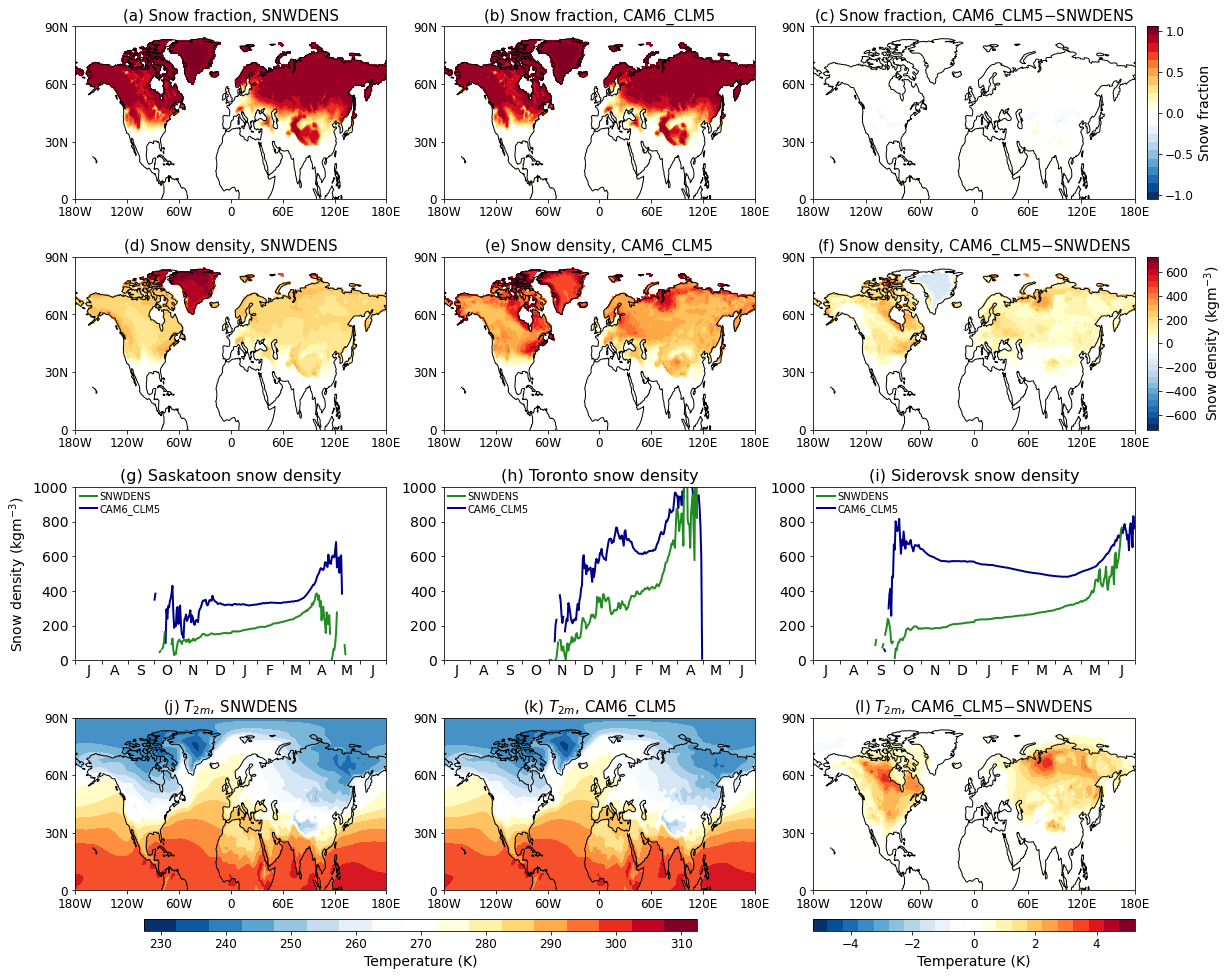

In [8]:
fig = plt.figure(figsize=(16,16))

ax1 = maps.contourmap_bothcontinents_fill_nh_pos(fig, np.array(fsno_snowd_djf), np.array(fsno_snowd_djf.lon), np.array(fsno_snowd_djf.lat), 0.1, -1,1,
                                                 '(a) Snow fraction, SNWDENS',0.05,0.32,0.8,0.95)

ax2 = maps.contourmap_bothcontinents_fill_nh_pos(fig, np.array(fsno_clm5_djf), np.array(fsno_clm5_djf.lon), np.array(fsno_clm5_djf.lat),0.1,-1,1,
                                                 '(b) Snow fraction, CAM6_CLM5',0.37,0.64,0.8,0.95)

ax3 = maps.contourmap_bothcontinents_fill_nh_pos(fig, np.array(fsno_clm5_djf) - np.array(fsno_snowd_djf), np.array(fsno_snowd_djf.lon), np.array(fsno_snowd_djf.lat),0.1,-1,1,
                                                 '(c) Snow fraction, CAM6_CLM5$-$SNWDENS', 0.69,0.97,0.8,0.95)

ax = cbar.plotcolorbar(fig, 0.1,-1,1,'Snow fraction',0.98,0.99,0.8,0.95,orient='vertical', posneg='both', ticks=[-1,-0.5,0,0.5,1], fsize=12)


ax1 = maps.contourmap_bothcontinents_fill_nh_pos(fig, np.array(rhosnowddjf), np.array(rhosnowddjf.lon), np.array(rhosnowddjf.lat), 50, -700,700,
                                                 '(d) Snow density, SNWDENS',0.05,0.32,0.6,0.75)

ax2 = maps.contourmap_bothcontinents_fill_nh_pos(fig, np.array(rhoclm5djf), np.array(rhoclm5djf.lon), np.array(rhoclm5djf.lat),50,-700,700,
                                                 '(e) Snow density, CAM6_CLM5',0.37,0.64,0.6,0.75)

ax3 = maps.contourmap_bothcontinents_fill_nh_pos(fig, np.array(rhoclm5djf) - np.array(rhosnowddjf), np.array(rhoclm5djf.lon), np.array(rhoclm5djf.lat),50,-700,700,
                                                 '(f) Snow density, CAM6_CLM5$-$SNWDENS', 0.69,0.97,0.6,0.75)

ax = cbar.plotcolorbar(fig, 50,-700,700,'Snow density (kgm$^{-3}$)',0.98,0.99,0.6,0.75,orient='vertical', posneg='both', 
                       ticks=[-600,-400,-200,0,200,400,600], fsize=12)

# Saskatoon
ax = lineplot.plotlinetime_j2j(fig, rhosnow_clm5m[:,0], 0.05,0.32,0.4,0.55,'(g) Saskatoon snow density',
                              yrange=(0,1000),yticks=(0,200,400,600,800,1000),yticklabels=['0','200','400','600','800','1000'],
                              ytitle='Snow density (kgm$^{-3}$) ', linecolor='darkblue')
ax = lineplot.oplotlinetime_j2j(ax, rhosnow_snowdm[:,0], linecolor='forestgreen' )
ax.plot([5,25],[950,950], color='forestgreen', linewidth=2)
ax.text(28,930,'SNWDENS')
ax.plot([5,25],[880,880], color='darkblue', linewidth=2)
ax.text(28,860,'CAM6_CLM5')


# Toronto
ax = lineplot.plotlinetime_j2j(fig, rhosnow_clm5m[:,1], 0.37,0.64,0.4,0.55,'(h) Toronto snow density',
                              yrange=(0,1000),yticks=(0,200,400,600,800,1000),yticklabels=['0','200','400','600','800','1000'],
                              ytitle=' ', linecolor='darkblue')
ax = lineplot.oplotlinetime_j2j(ax, rhosnow_snowdm[:,1], linecolor='forestgreen' )
ax.plot([5,25],[950,950], color='forestgreen', linewidth=2)
ax.text(28,930,'SNWDENS')
ax.plot([5,25],[880,880], color='darkblue', linewidth=2)
ax.text(28,860,'CAM6_CLM5')

# Siderovsk
ax = lineplot.plotlinetime_j2j(fig, rhosnow_clm5m[:,2], 0.69,0.97,0.4,0.55,'(i) Siderovsk snow density',
                              yrange=(0,1000),yticks=(0,200,400,600,800,1000),yticklabels=['0','200','400','600','800','1000'],
                              ytitle=' ', linecolor='darkblue')
ax = lineplot.oplotlinetime_j2j(ax, rhosnow_snowdm[:,2], linecolor='forestgreen' )
ax.plot([5,25],[950,950], color='forestgreen', linewidth=2)
ax.text(28,930,'SNWDENS')
ax.plot([5,25],[880,880], color='darkblue', linewidth=2)
ax.text(28,860,'CAM6_CLM5')



ax1 = maps.contourmap_bothcontinents_fill_nh_pos(fig, np.array(snowdtrefhtdjf), np.array(snowdtrefhtdjf.lon), np.array(snowdtrefhtdjf.lat), 5, 230,310,
                                                 '(j) $T_{2m}$, SNWDENS',0.05,0.32,0.2,0.35)
ax2 = maps.contourmap_bothcontinents_fill_nh_pos(fig, np.array(clm5trefhtdjf), np.array(clm5trefhtdjf.lon), np.array(clm5trefhtdjf.lat), 5, 230, 310,
                                                 '(k) $T_{2m}$, CAM6_CLM5',0.37,0.64,0.2,0.35)
ax3 = maps.contourmap_bothcontinents_fill_nh_pos(fig, np.array(clm5trefhtdjf)-np.array(snowdtrefhtdjf), np.array(clm5trefhtdjf.lon), np.array(clm5trefhtdjf.lat),
                                                 0.5,-5,5,'(l) $T_{2m}$, CAM6_CLM5$-$SNWDENS',0.69,0.97,0.2,0.35)

ax4 = cbar.plotcolorbar(fig, 5, 230, 310, 'Temperature (K)',0.11,0.59,0.165,0.175,ticks=([230,240,250,260,270,280,290,300,310]), fsize=12)
ax4 = cbar.plotcolorbar(fig, 0.5,-5,5,'Temperature (K)',0.69,0.97,0.165,0.175,ticks=([-10,-8,-6,-4,-2,0,2,4,6,8,10]), fsize=12)

fig.savefig(plotpath+'fig5.pdf', facecolor='white', bbox_inches='tight')

In [11]:
print(-7000*np.log(0.9926))

51.99261080157609
